 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [51]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

In [52]:
## Whale Returns
# Doing all data reading an cleaning in one place and the re-doing by breaking them out.

# Read the Whale Portfolio daily returns and clean the data.
whale_returns_path = Path("./Resources/whale_returns.csv")
algo_returns_path = Path("./Resources/algo_returns.csv")
sp_tsx_history_path = Path("./Resources/sp_tsx_history.csv")

whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Visually check if tehre is any anomaly 
whale_returns_df.dtypes
algo_returns_df.dtypes
sp_tsx_history_df.dtypes

# Count nulls
whale_returns_df.isna().sum()
algo_returns_df.isna().sum()
sp_tsx_history_df.isna().sum()

# Drop nulls
whale_returns_df.dropna(inplace=True)
algo_returns_df.dropna(inplace=True)
sp_tsx_history_df.dropna(inplace=True)

# Deduplicating
# Checking if there is any
whale_returns_df.duplicated().sum()
algo_returns_df.duplicated().sum()
sp_tsx_history_df.duplicated().sum()

# Seeing the duplicated rows
whale_returns_df.loc[whale_returns_df.duplicated()]
algo_returns_df.loc[algo_returns_df.duplicated()]
sp_tsx_history_df.loc[sp_tsx_history_df.duplicated()]

# Removing duplicates
whale_returns_df = whale_returns_df.drop_duplicates().copy()
algo_returns_df = algo_returns_df.drop_duplicates().copy()
sp_tsx_history_df = sp_tsx_history_df.drop_duplicates().copy()

# Checking if duplicates removed
whale_returns_df.duplicated().sum()
algo_returns_df.duplicated().sum()
sp_tsx_history_df.duplicated().sum()

# Removing "$" and "," form the data and convert the field to the type float64
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "", regex=False)
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "", regex=False)
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype('float')
sp_tsx_history_df.head()
sp_tsx_history_df.dtypes

# Setting "Date" as indices (if it's not already)
# whale_returns_df.set_index(whale_returns_df["Date"], inplace=True)
# algo_returns_df.set_index(algo_returns_df["Date"], inplace=True)
# sp_tsx_history_df.set_index(sp_tsx_history_df["Date"], inplace=True)

# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df.rename(columns = {'Close' : 'SP_TSX_Close'}, inplace = True)

# Combining all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_history_df], axis="columns", join="inner")

# Sorting by Date
combined_df.sort_index(inplace=True, ascending=True)
combined_df.head()
combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49


In [53]:
# Reading whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [54]:
# Count nulls
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [55]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.duplicated().sum()
whale_returns_df = whale_returns_df.drop_duplicates().copy()
whale_returns_df.duplicated().sum()

0

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [56]:
# Reading algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [57]:
# Count nulls
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [58]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.duplicated().sum()
algo_returns_df = algo_returns_df.drop_duplicates().copy()
algo_returns_df.duplicated().sum()

0

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [59]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("./Resources/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history_df.dtypes
sp_tsx_history_df.duplicated().sum()
sp_tsx_history_df = sp_tsx_history_df.drop_duplicates().copy()
sp_tsx_history_df.duplicated().sum()

0

In [60]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [61]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "", regex=False)
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "", regex=False)
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype('float')
sp_tsx_history_df.head()
sp_tsx_history_df.dtypes

Close    float64
dtype: object

In [62]:
# Calculate Daily Returns
sp_tsx_history_df_returns = sp_tsx_history_df.pct_change()

In [63]:
# Drop nulls
sp_tsx_history_df.isna().sum()
sp_tsx_history_df.dropna(inplace=True)

In [64]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df.rename(columns = {'Close' : 'SP_TSX_Close'}, inplace = True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [65]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_history_df], axis="columns", join="inner")
combined_df.sort_index(inplace=True, ascending=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

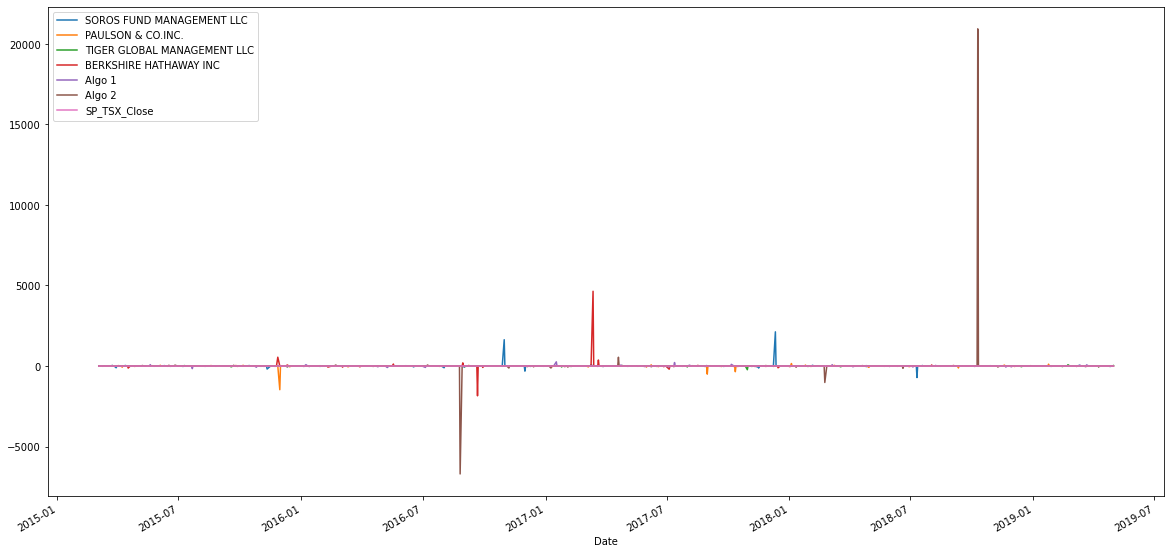

In [66]:
# Plot daily returns of all portfolios
combined_df_returns = combined_df.pct_change()
combined_df_returns.head()
combined_df_returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

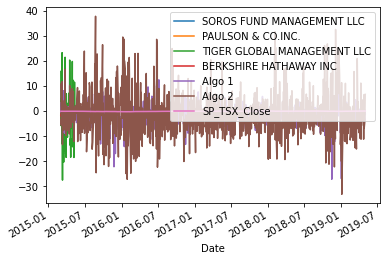

In [67]:
# Calculate cumulative returns of all portfolios
cumulative_combined_df_returns = (1 + combined_df_returns).cumprod() - 1
cumulative_combined_df_returns.head()

# Plot cumulative returns
cumulative_combined_df_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:xlabel='Date'>

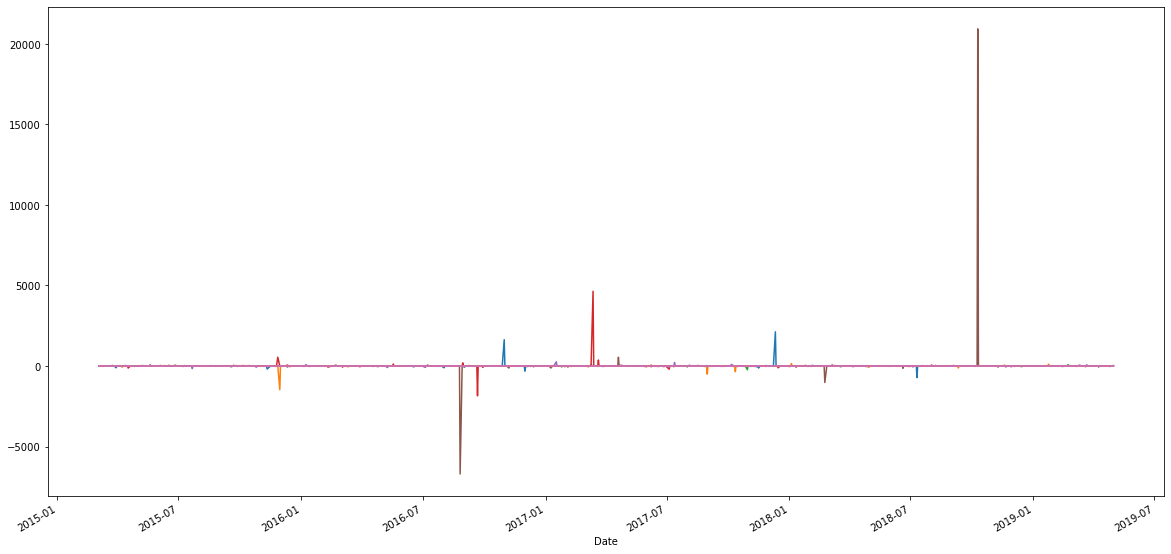

In [68]:
# Box plot to visually show risk
combined_df_returns["SOROS FUND MANAGEMENT LLC"].plot()
combined_df_returns["PAULSON & CO.INC. "].plot()
combined_df_returns["TIGER GLOBAL MANAGEMENT LLC"].plot()
combined_df_returns["BERKSHIRE HATHAWAY INC"].plot()
combined_df_returns["Algo 1"].plot()
combined_df_returns["Algo 2"].plot()
combined_df_returns["SP_TSX_Close"].plot(figsize=(20,10))

### Calculate Standard Deviations

In [69]:
# Calculate the daily standard deviations of all portfolios
combined_df_returns_volatility = combined_df_returns.std()
combined_df_returns_volatility[0:7]

SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                          16.019064
Algo 2                         697.771667
SP_TSX_Close                     0.007077
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [70]:
# Calculate the daily standard deviation of S&P TSX 60
sp_tsx_df_returns_volatility = combined_df_returns["SP_TSX_Close"].std()
sp_tsx_df_returns_volatility

# Determine which portfolios are riskier than the S&P TSX 60
combined_df_returns_volatility = combined_df_returns_volatility.sort_values()
combined_df_returns_volatility.loc[combined_df_returns_volatility > sp_tsx_df_returns_volatility]

Algo 1     16.019064
Algo 2    697.771667
dtype: float64

### Calculate the Annualized Standard Deviation

In [71]:
# Calculate the annualized standard deviation (252 trading days)
combined_df_returns_volatility_annualized = combined_df_returns_volatility * np.sqrt(252)
combined_df_returns_volatility_annualized[0:7]

SP_TSX_Close                       0.112344
Algo 1                           254.294756
Algo 2                         11076.781822
SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

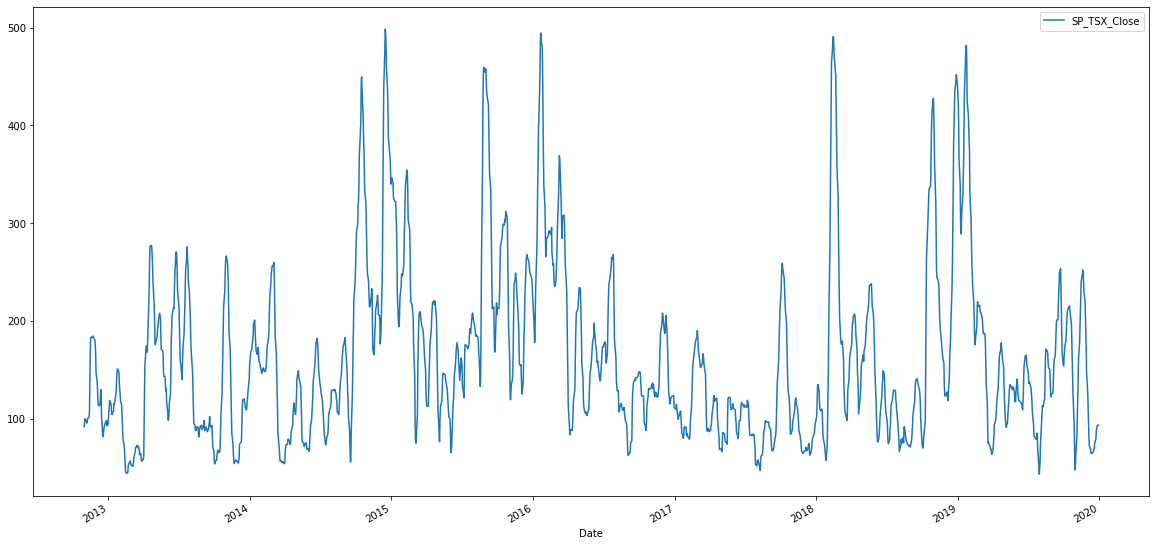

In [72]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

sp_tsx_history_df_std_21 = sp_tsx_history_df.rolling(window=21).std()
sp_tsx_history_df_std_21

# Plot the rolling standard deviation
sp_tsx_history_df_std_21.plot(figsize=(20,10))

### Calculate and plot the correlation

TIGER GLOBAL MANAGEMENT LLC    0.025897
Name: SP_TSX_Close, dtype: float64

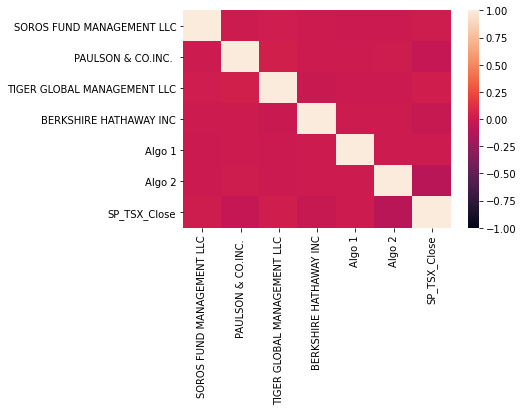

In [73]:
# Calculate the correlation
correlation = combined_df_returns.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

# Determining which portfolios may mimick the S&P TSX 60.
most_similar_to_sp_tsx = correlation['SP_TSX_Close'].loc[correlation['SP_TSX_Close'] == max(correlation['SP_TSX_Close'][0:6])]
most_similar_to_sp_tsx

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of a stock'}, xlabel='Date'>

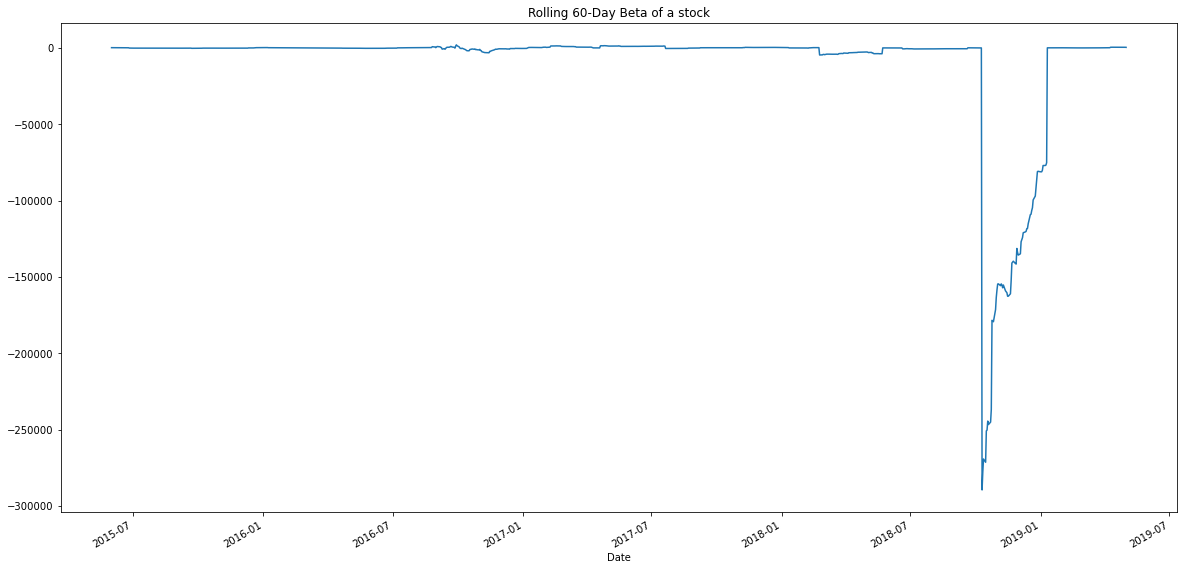

In [74]:
# Calculate covariance of a single portfolio
# tiger_covariance = combined_df_returns["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_df_returns["SP_TSX_Close"])
tiger_covariance = combined_df_returns["Algo 2"].rolling(window=60).cov(combined_df_returns["SP_TSX_Close"])
tiger_covariance

# Calculate variance of S&P TSX
variance = combined_df_returns["SP_TSX_Close"].rolling(window=60).var()
variance

# Computing beta
rolling_tiger_beta = tiger_covariance / variance
rolling_tiger_beta

# Plot beta trend
rolling_tiger_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of a stock")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [75]:
# Use `ewm` to calculate the rolling window
ewm_21 = combined_df_returns["SP_TSX_Close"].ewm(halflife=21).mean()
ewm_21

Date
2015-03-03         NaN
2015-03-04   -0.003371
2015-03-05   -0.000974
2015-03-06   -0.004073
2015-03-09   -0.004725
                ...   
2019-04-25    0.001068
2019-04-26    0.001106
2019-04-29    0.001045
2019-04-30    0.000973
2019-05-01    0.000788
Name: SP_TSX_Close, Length: 997, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [76]:
# Annualized Sharpe Ratios

combined_df_sharpe_ratios = (combined_df_returns.mean() * 252) / (combined_df_returns_volatility_annualized)
combined_df_sharpe_ratios

Algo 1                        -0.798641
Algo 2                         0.275544
BERKSHIRE HATHAWAY INC              NaN
PAULSON & CO.INC.                   NaN
SOROS FUND MANAGEMENT LLC           NaN
SP_TSX_Close                   0.251209
TIGER GLOBAL MANAGEMENT LLC         NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

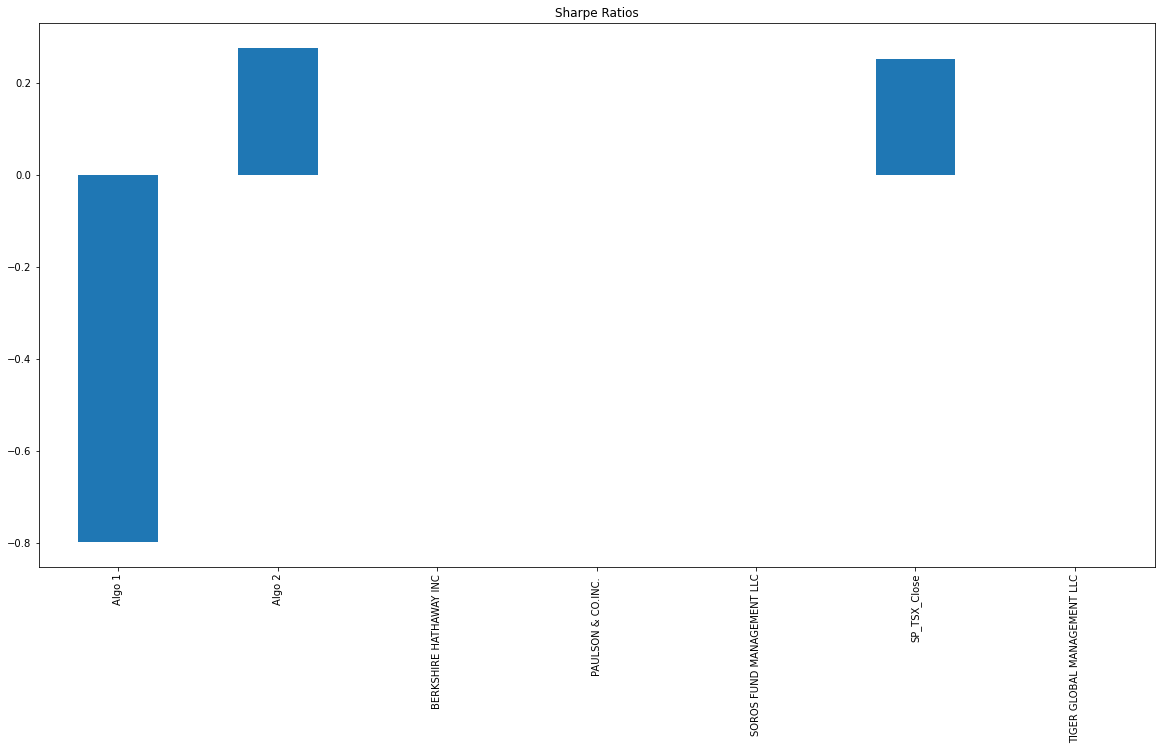

In [77]:
# Visualize the sharpe ratios as a bar plot
combined_df_sharpe_ratios.plot.bar(title="Sharpe Ratios", figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 2 has a better perfomance than S&P TSX 60

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [78]:
# Reading data from 1st stock

l_historical_path = Path("./Resources/l_historical.csv")
l_historical_df = pd.read_csv(l_historical_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
l_historical_df.head()
l_historical_df.tail()

,Symbol,Close
Date,,
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67
2019-12-27,L,67.78
2019-12-30,L,67.33


In [79]:
# Reading data from 2nd stock
otex_historical_path = Path("./Resources/otex_historical.csv")
otex_historical_df = pd.read_csv(otex_historical_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
otex_historical_df.head()
otex_historical_df.tail()

,Symbol,Close
Date,,
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44
2019-12-27,OTEX,57.70
2019-12-30,OTEX,57.19


In [80]:
# Reading data from 3rd stock
shop_historical_path = Path("./Resources/shop_historical.csv")
shop_historical_df = pd.read_csv(shop_historical_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop_historical_df.head()
shop_historical_df.tail()

,Symbol,Close
Date,,
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39
2019-12-27,SHOP,534.76
2019-12-30,SHOP,517.79


In [81]:
# Combine all stocks in a single DataFrame

l_historical_df.rename(columns = {'Close' : 'L_Close'}, inplace = True)
otex_historical_df.rename(columns = {'Close' : 'OTEX_Close'}, inplace = True)
shop_historical_df.rename(columns = {'Close' : 'SHOP_Close'}, inplace = True)

l_historical_df.drop('Symbol', axis=1, inplace=True)
otex_historical_df.drop('Symbol', axis=1, inplace=True)
shop_historical_df.drop('Symbol', axis=1, inplace=True)

combined_stocks_df = pd.concat([l_historical_df, otex_historical_df, shop_historical_df], axis="columns", join="inner")
combined_stocks_df.head()
combined_stocks_df.tail()

,L_Close,OTEX_Close,SHOP_Close
Date,,,
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39
2019-12-27,67.78,57.70,534.76
2019-12-30,67.33,57.19,517.79


In [82]:
# Reset Date index
combined_stocks_df.reset_index().set_index("Date")
combined_stocks_df.head()

,L_Close,OTEX_Close,SHOP_Close
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [83]:
# Reorganize portfolio data by having a column per symbol
# Already done
combined_stocks_df.dtypes

L_Close       float64
OTEX_Close    float64
SHOP_Close    float64
dtype: object

<AxesSubplot:xlabel='Date'>

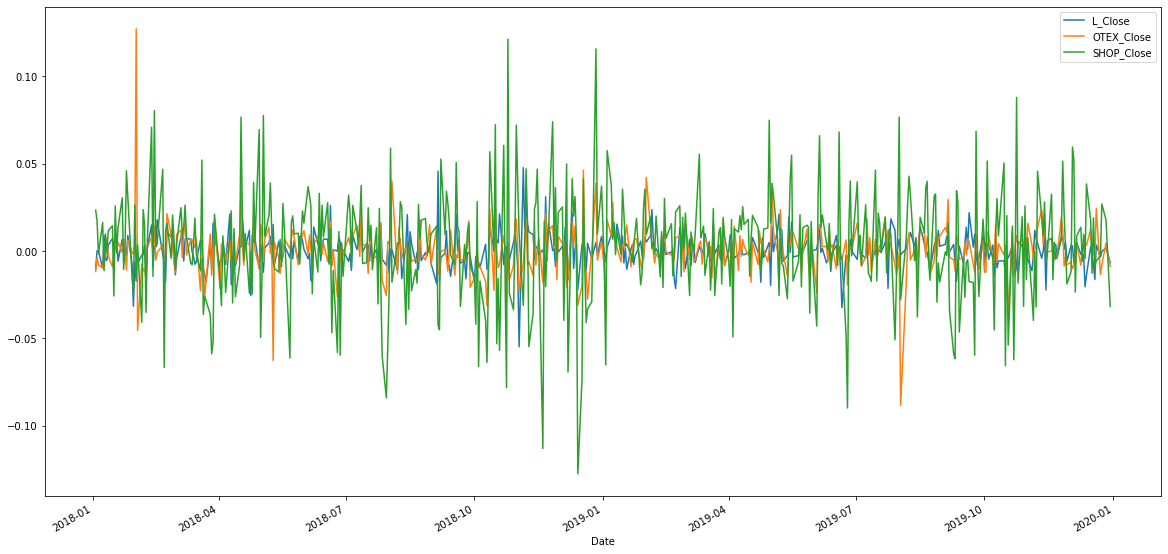

In [84]:
# Calculate daily returns
combined_stocks_returns = combined_stocks_df.pct_change()
combined_stocks_returns.head()

# Drop NAs
combined_stocks_returns.dropna(inplace=True)
combined_stocks_returns.isna().sum()

# Display sample data
combined_stocks_returns.plot(figsize=(20,10))

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

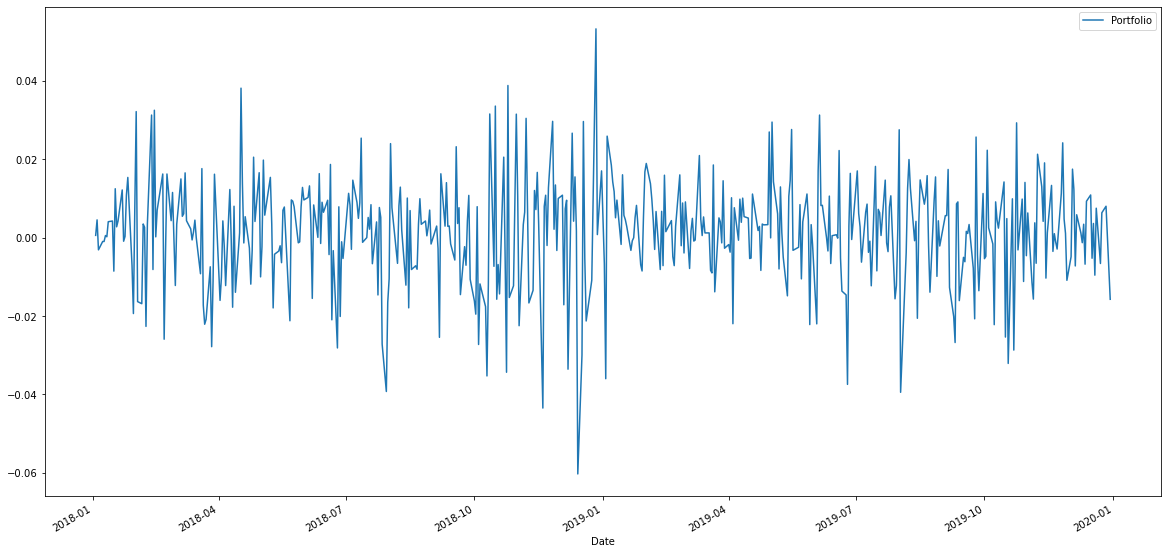

In [85]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combined_portfolio_returns = combined_stocks_returns.dot(weights)
combined_portfolio_returns = combined_portfolio_returns.to_frame(name='Portfolio')
combined_portfolio_returns.head()

# Display sample data
combined_portfolio_returns.plot(figsize=(20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [86]:
# Join your returns DataFrame to the original returns DataFrame
combined_stocks_returns = pd.concat([combined_stocks_returns, combined_portfolio_returns], axis="columns", join="inner")
combined_stocks_returns.head()

,L_Close,OTEX_Close,SHOP_Close,Portfolio
Date,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565
2018-01-04,0.000174,-0.003715,0.017092,0.004517
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999


In [87]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_stocks_returns.dropna(inplace=True)
combined_stocks_returns.isna().sum()

L_Close       0
OTEX_Close    0
SHOP_Close    0
Portfolio     0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [88]:
# Calculate the annualized `std`
combined_stocks_returns_volatility = combined_stocks_returns.std()
combined_stocks_returns_annualized = combined_stocks_returns_volatility * np.sqrt(252)
combined_stocks_returns_annualized

L_Close       0.152369
OTEX_Close    0.215132
SHOP_Close    0.488717
Portfolio     0.216794
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

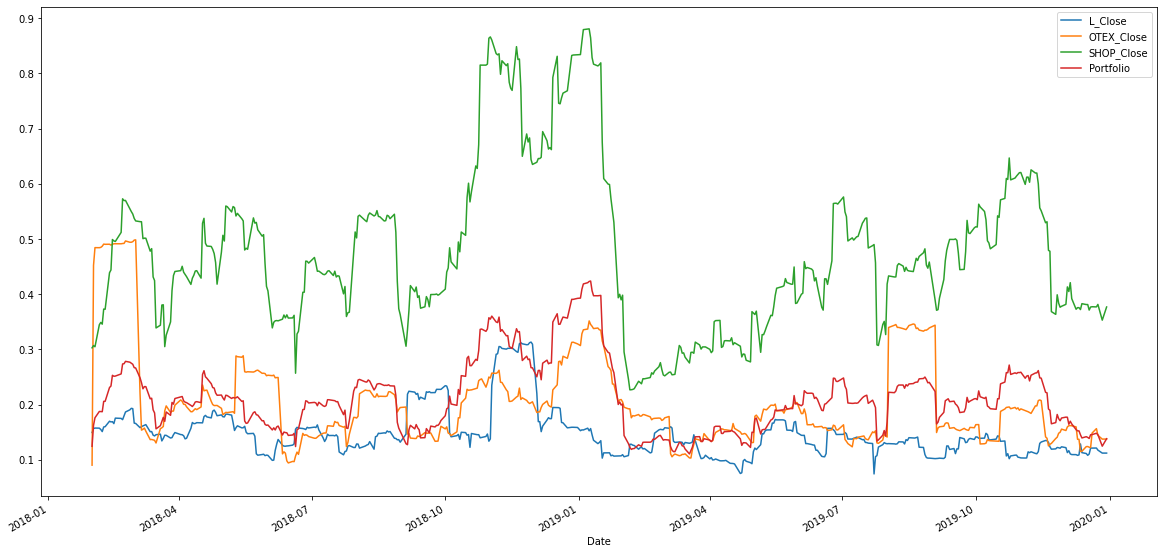

In [89]:
# Calculate rolling standard deviation

combined_stocks_returns_volatility_std_21 = combined_stocks_returns.rolling(window=21).std()
combined_stocks_returns_volatility_std_21 = combined_stocks_returns_volatility_std_21 * np.sqrt(252)
combined_stocks_returns_volatility_std_21

# Plot rolling standard deviation
combined_stocks_returns_volatility_std_21.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

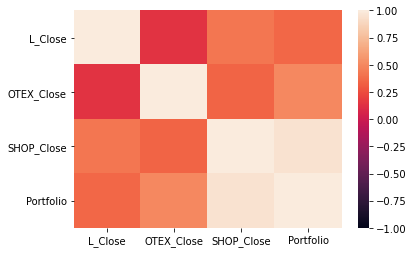

In [90]:
# Calculate and plot the correlation
sample_correlation = combined_stocks_returns_volatility_std_21.corr()
sample_correlation

sns.heatmap(sample_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of the portfolio'}>

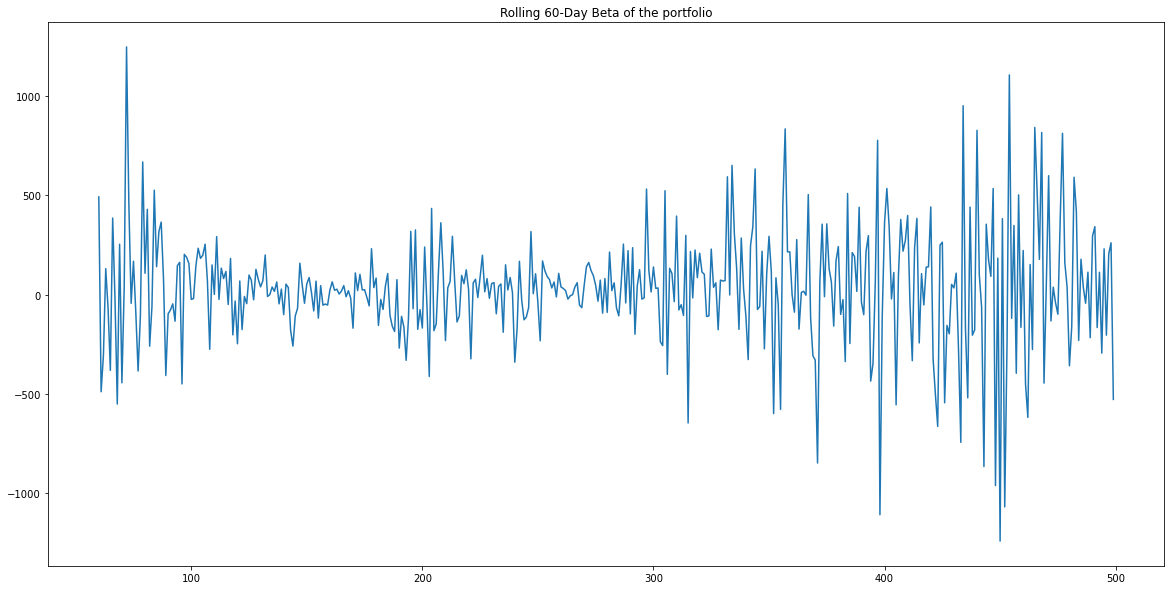

In [91]:
# Calculate and plot Beta
portfolio_flat = combined_portfolio_returns
sp_tsx_flat = combined_df_returns["SP_TSX_Close"]

portfolio_flat = portfolio_flat.reset_index()
portfolio_flat = portfolio_flat["Portfolio"]

sp_tsx_flat = sp_tsx_flat.reset_index()
sp_tsx_flat = sp_tsx_flat["SP_TSX_Close"]

combined_portfolio_returns_covariance = portfolio_flat.rolling(window=60).cov(sp_tsx_flat)
combined_portfolio_returns_covariance = portfolio_flat.dropna()
combined_portfolio_returns_covariance = combined_portfolio_returns_covariance.dropna()
combined_portfolio_returns_covariance

# Calculate variance of S&P TSX
sp_tsx_variance = sp_tsx_flat.rolling(window=60).var()
sp_tsx_variance = sp_tsx_variance.dropna()
sp_tsx_variance

# Computing beta
rolling_portfolio_beta = combined_portfolio_returns_covariance / sp_tsx_variance
rolling_portfolio_beta = rolling_portfolio_beta.dropna()
rolling_portfolio_beta

# # Plot beta trend
rolling_portfolio_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of the portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Calculate Annualzied Sharpe Ratios
combined_stocks_returns_volatility_annualized = combined_stocks_returns_volatility * np.sqrt(252)
combined_stocks_sharpe_ratios = (combined_stocks_returns.mean() * 252) / (combined_stocks_returns_volatility_annualized)

<AxesSubplot:title={'center':'Sharpe Ratios'}>

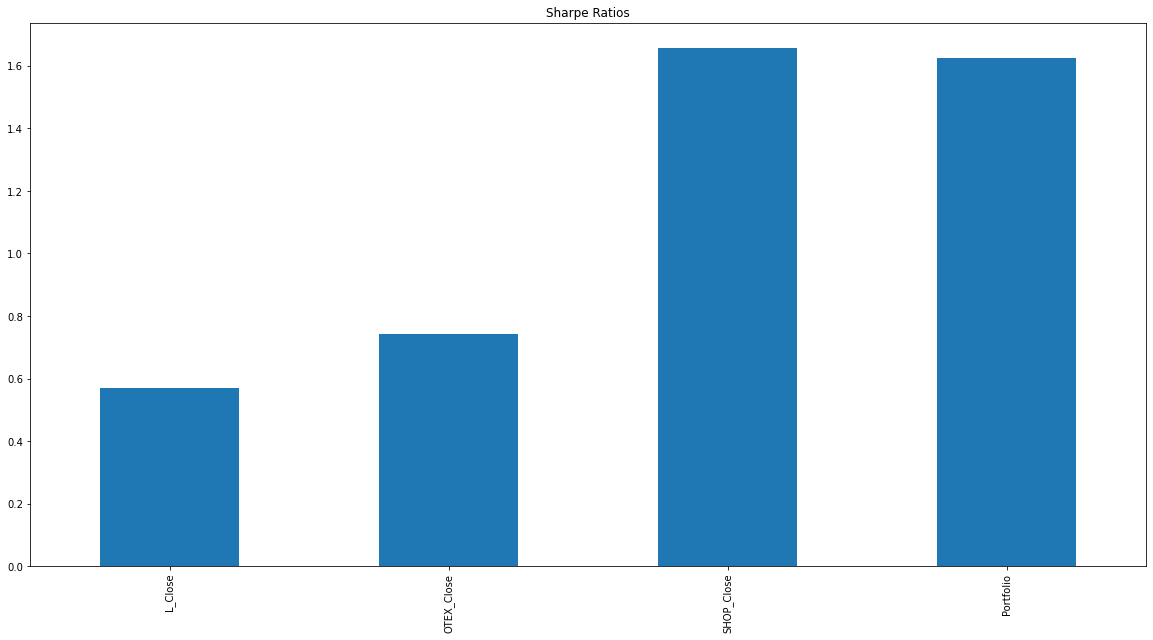

In [93]:
# Visualize the sharpe ratios as a bar plot
combined_stocks_sharpe_ratios.plot.bar(title="Sharpe Ratios", figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [94]:
# The portfolio perfporms fine (far better than L and OTEX), and it would be better if SHOP has more weigth than the other stocks.